# Test the model

Loads the saved model and test it with some data.

In [1]:

import tensorflow as tf

from second_util import MODEL_NAME
from utils import datadir

model = tf.keras.models.load_model(datadir(MODEL_NAME))
model.summary()

2024-01-28 01:13:02.296685: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-01-28 01:13:02.296706: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-01-28 01:13:02.296711: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-01-28 01:13:02.296740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-28 01:13:02.296753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 cross_product_layer (Cross  (None, 152)                  152       ['input_1[0][0]']             
 ProductLayer)                                                                                    
                                                                                                  
 dense (Dense)               (None, 1024)                 156672    ['cross_product_layer[0][0]'] 
                                                                                                  
 dropout (Dropout)           (None, 1024)                 0         ['dense[0][0]']           

In [2]:
import pandas as pd
from second_util import INPUT_DATASET, INPUT_DATASET_ORIG, TRANSF_DATASET

input_dataset = pd.read_pickle(datadir(INPUT_DATASET))
input_dataset_orig = pd.read_pickle(datadir(INPUT_DATASET_ORIG))
trans_dataset = pd.read_pickle(datadir(TRANSF_DATASET))

In [3]:
trans_dataset

,tx,ty,theta,flip
num,,,,
0,1.208058,-0.217209,0.459876,1.0
1,1.887024,0.812764,-0.340135,1.0
2,0.036770,-0.762667,0.543446,-1.0
3,-0.952693,1.312198,0.349189,1.0
4,-0.258155,-1.002596,-0.792324,1.0
...,...,...,...,...
995,-1.244507,-0.323308,-0.858993,-1.0
996,-1.128670,-0.945927,-0.928152,-1.0
997,0.940769,0.629136,-0.938785,1.0


## Now try to visualize things

Let's try drawing *tooth*, *bone* and *axe*.

2024-01-28 01:13:02.979916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


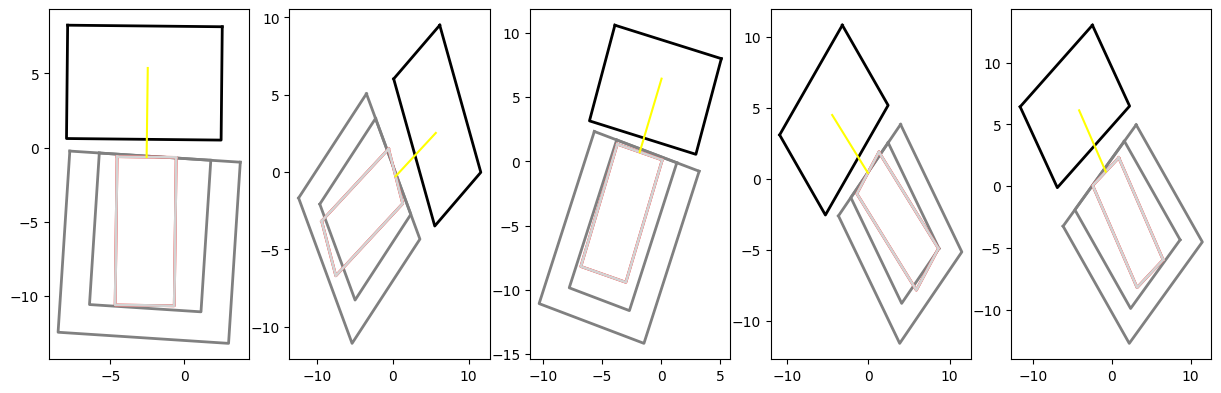

In [4]:

from utils import draw_solution
import numpy as np
import tensorflow as tf
from second_util import convert_sol


def draw_some(n=5, input_dataset=input_dataset, orig_dataset=input_dataset_orig,
              trans_dataset=trans_dataset):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(15, 10))

    for i in range(n):
        ax = fig.add_subplot(n // 5 + 1, 5, i + 1)
        idx = np.random.randint(len(input_dataset))
        prob = tf.convert_to_tensor(input_dataset.to_numpy()[idx])
        orig = orig_dataset.to_numpy()[idx].reshape(2, 8) if orig_dataset is not None else None
        trans = trans_dataset.to_numpy()[idx] if trans_dataset is not None else None
        prob = tf.reshape(prob, (1, -1))
        sol = model(prob)
        sol = convert_sol(model(prob))

        draw_solution(ax, prob.numpy().reshape((2, 8)), sol, orig=orig, trans=trans)


draw_some(5)

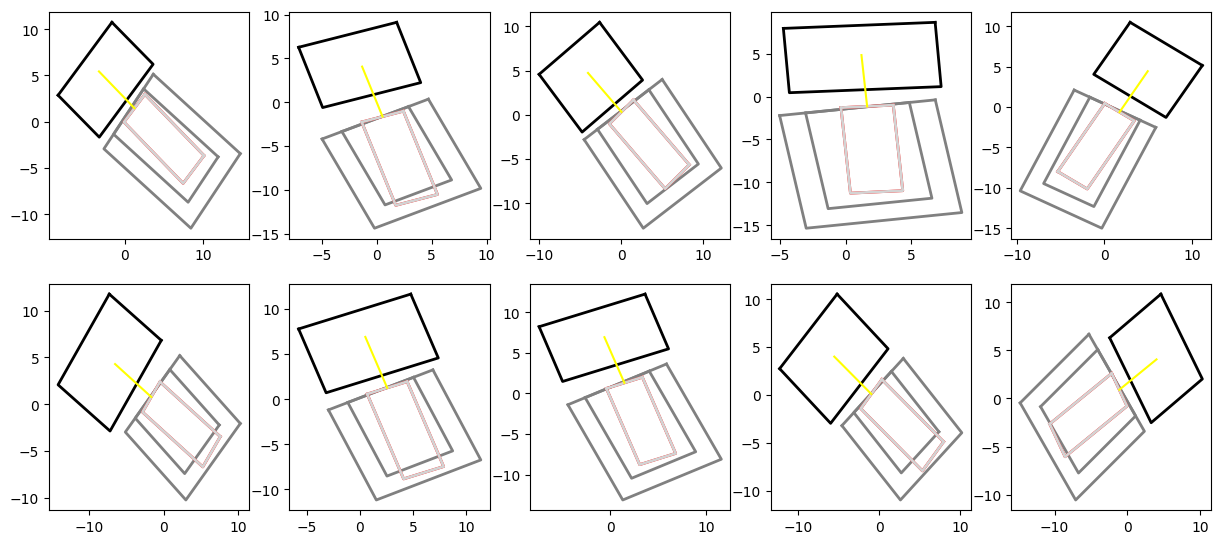

In [5]:
draw_some(10)

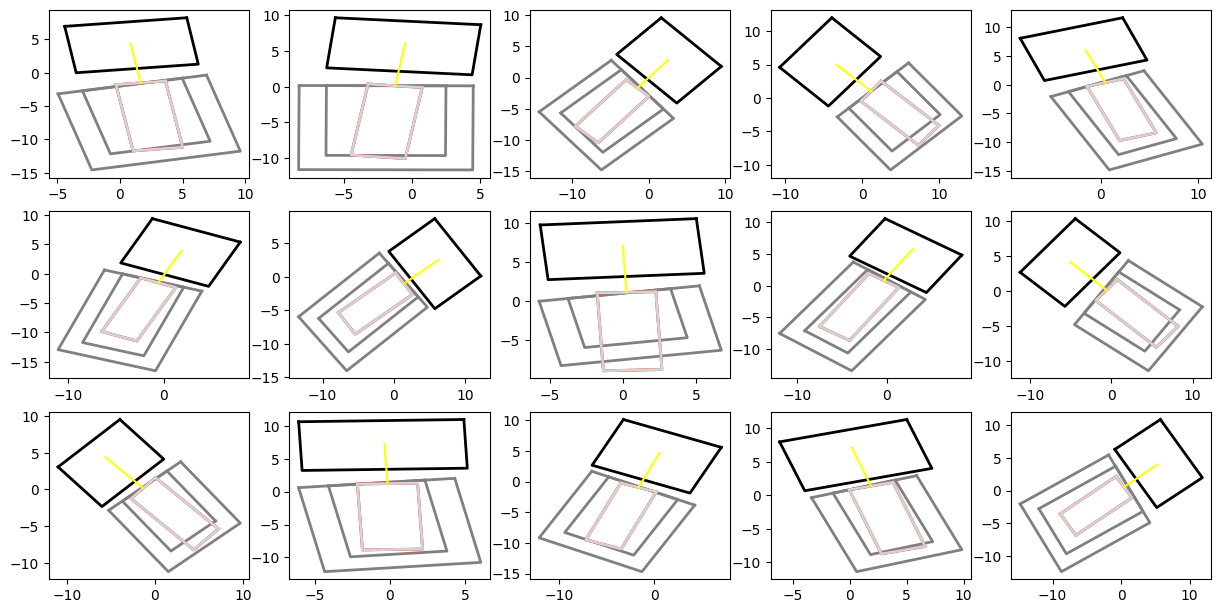

In [6]:
draw_some(15)

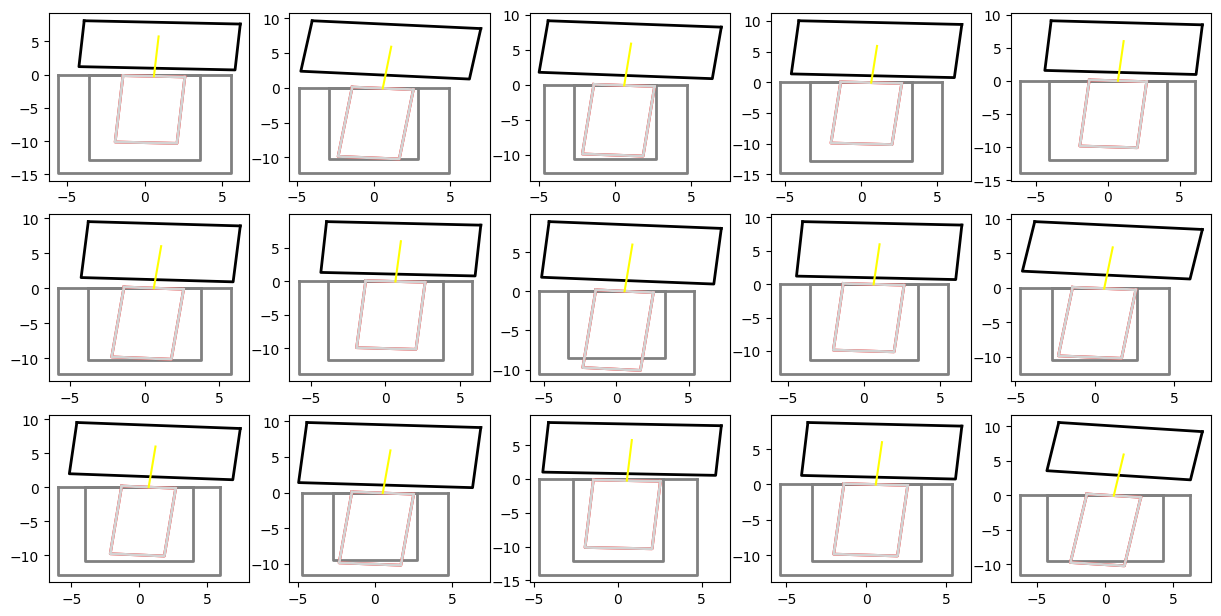

In [7]:
draw_some(15, input_dataset=input_dataset_orig, trans_dataset=None)

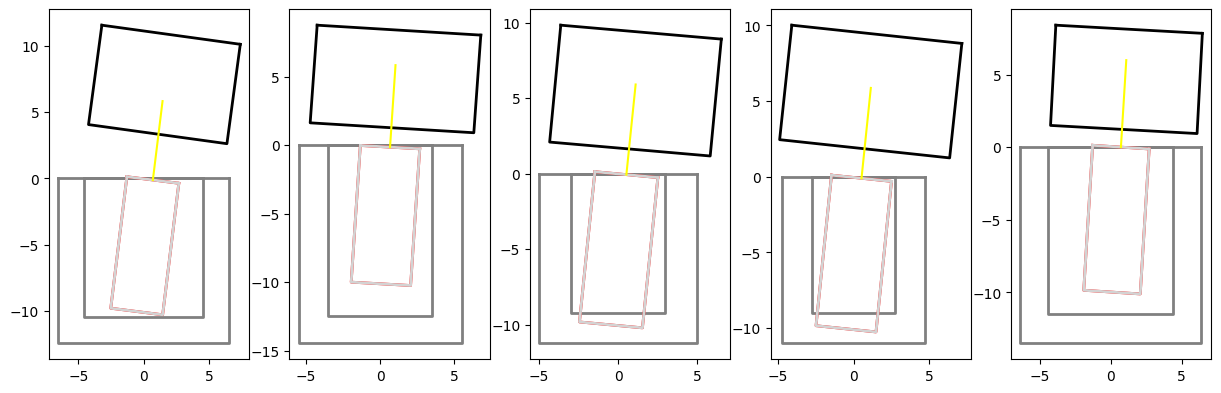

In [9]:
draw_some(5, input_dataset=input_dataset_orig, trans_dataset=None)